Author :- NISHANT MEDPALWAR

Sentiment Analysis


In [1]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\nisha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\nisha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\nisha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\nisha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\nisha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

Importing Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')
     

Dataset

In [3]:
data = pd.read_csv('./training.1600000.processed.noemoticon.csv',
                 delimiter=',', encoding='ISO-8859-1')
data.columns = ['Sentiment','id','date','query','user','text']
data.head()

,Sentiment,id,date,query,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
data = data[['Sentiment','text']]
     

In [5]:
data.columns

Index(['Sentiment', 'text'], dtype='object')

In [6]:
data.Sentiment.value_counts()

Sentiment
4    800000
0    799999
Name: count, dtype: int64

In [7]:
data['Sentiment'] = data['Sentiment'].replace({4:1})

- 0 represent Negative sentiment
- 1 represents Positive sentiment


Visualizing the count

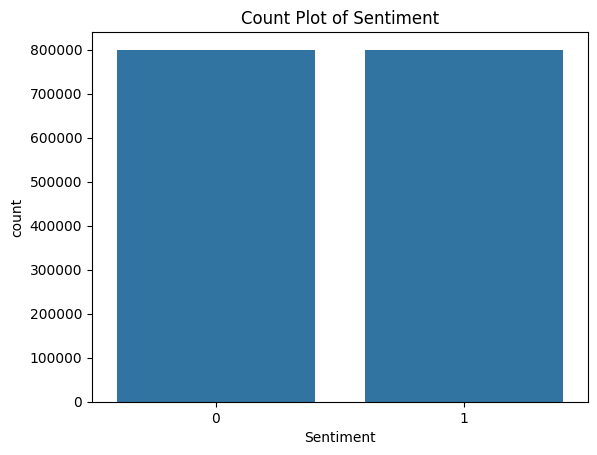

In [8]:
sns.countplot(x=data["Sentiment"])
plt.title("Count Plot of Sentiment")
plt.show()

In [9]:
data.isna().sum().sum()

0

Inference: The data is unbalanced therfore we will downsample the data to have same count for each sentiment

Downsampling the dataset

*Downsampling* (in this context) means training on a disproportionately low subset of the majority class examples. Upweighting means adding an example weight to the downsampled class equal to the factor by which you downsampled.

Downsampling enables you to create even smaller models since the machine learning algorithm doesn't require as many training data points. For embedded AI, memory usage is vital; creating a smaller but still highly accurate model allows you to save space for other application code and processes on the device

In [10]:
from sklearn.utils import resample

In [11]:
## majority class 0
data_majority = data[data['Sentiment']==0]
## minority class 1
data_minority = data[data['Sentiment']==1]

In [12]:
data_minority.shape

(800000, 2)

In [13]:
# downsample the majority class
data_majority_downsampled = resample(data_majority, 
                                 replace=True,   
                                 n_samples=len(data_minority),    
                                 random_state=1234) 

In [14]:
data = data._append(data,ignore_index=True)

Visualizing after downsampling

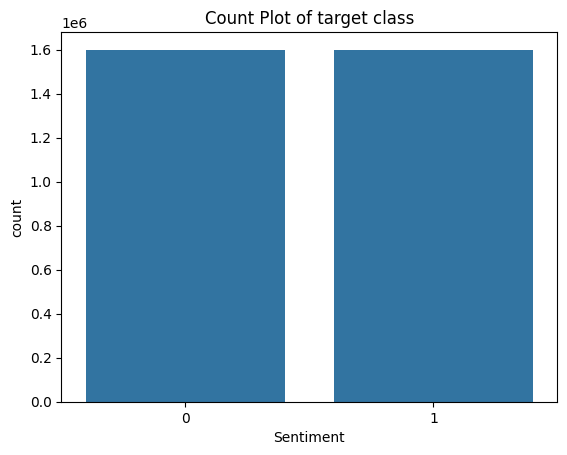

In [15]:
sns.countplot(x=data["Sentiment"])
plt.title("Count Plot of target class")
plt.show()

Data Preprocessing

- Removing stop words
- Removing punctuations
- Lemmatizing
- Removing tags
- Removing special characters
- Lowercase conversion

In [16]:
## remove stopwords and punctuation marks
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()

corpus = data['text'].tolist()
print(len(corpus))
print(corpus[0])

3199998
is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!


In [17]:
%%time
final_corpus = []
final_corpus_joined = []
for i in data.index:

    text = re.sub('[^a-zA-Z]', ' ', data['text'][i])
    #Convert to lowercase
    text = text.lower()
    #remove tags
    text=re.sub("</?.*?>"," <> ",text)
    
    # remove special characters and digits
    text=re.sub("(\d|\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()

    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text 
            if not word in stuff_to_be_removed] 
    text1 = " ".join(text)
    final_corpus.append(text)
    final_corpus_joined.append(text1)

CPU times: total: 2min 14s
Wall time: 2min 51s


Storing the cleaned data seperately

In [18]:
data_cleaned = pd.DataFrame()
data_cleaned["text"] = final_corpus_joined
data_cleaned["Sentiment"] = data["Sentiment"].values

In [19]:
data_cleaned['Sentiment'].value_counts()


Sentiment
1    1600000
0    1599998
Name: count, dtype: int64

In [20]:
data_cleaned.head()

,text,Sentiment
0,upset update facebook texting might cry result...,0
1,kenichan dived many time ball managed save res...,0
2,whole body feel itchy like fire,0
3,nationwideclass behaving mad see,0
4,kwesidei whole crew,0


Exploratory data analysis[EDA]

In [21]:
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['Sentiment'] = data["Sentiment"].values
data_eda.head()
     

,text,Sentiment
0,"[upset, update, facebook, texting, might, cry,...",0
1,"[kenichan, dived, many, time, ball, managed, s...",0
2,"[whole, body, feel, itchy, like, fire]",0
3,"[nationwideclass, behaving, mad, see]",0
4,"[kwesidei, whole, crew]",0


In [22]:
# Storing positive data seperately
positive = data_eda[data_eda['Sentiment'] == 1]
positive_list = positive['text'].tolist()

# Storing negative data seperately

negative = data_eda[data_eda['Sentiment'] == 0]
negative_list = negative['text'].tolist()

In [23]:
positive_all = " ".join([word for sent in positive_list for word in sent ])
negative_all = " ".join([word for sent in negative_list for word in sent ])

Word Cloud Positive data

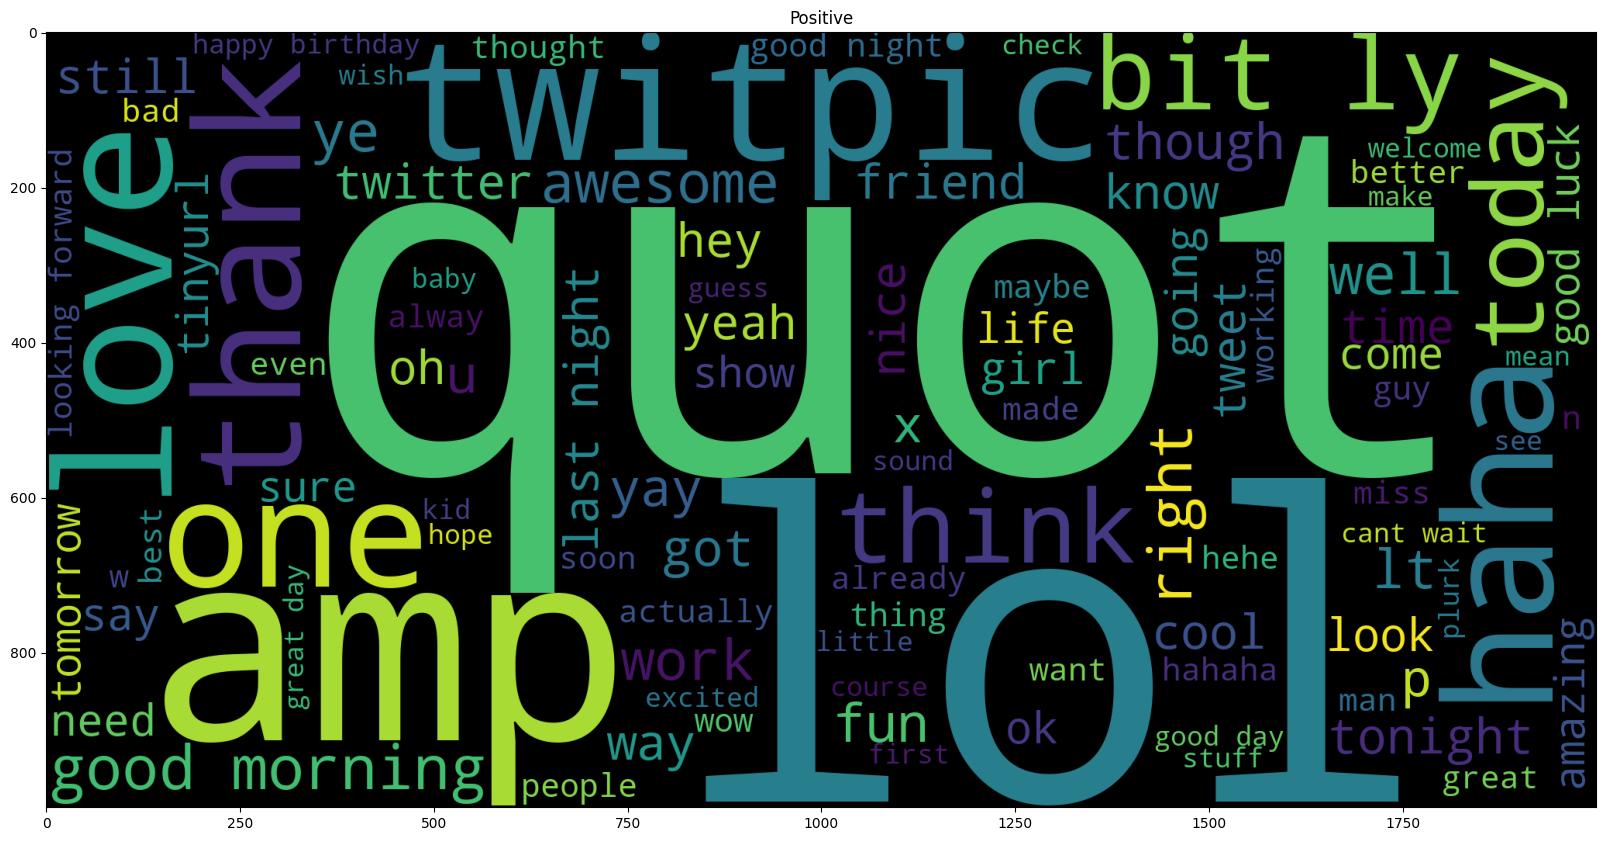

In [24]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='Black',
                      max_words = 100).generate(positive_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

Word Cloud Negative data



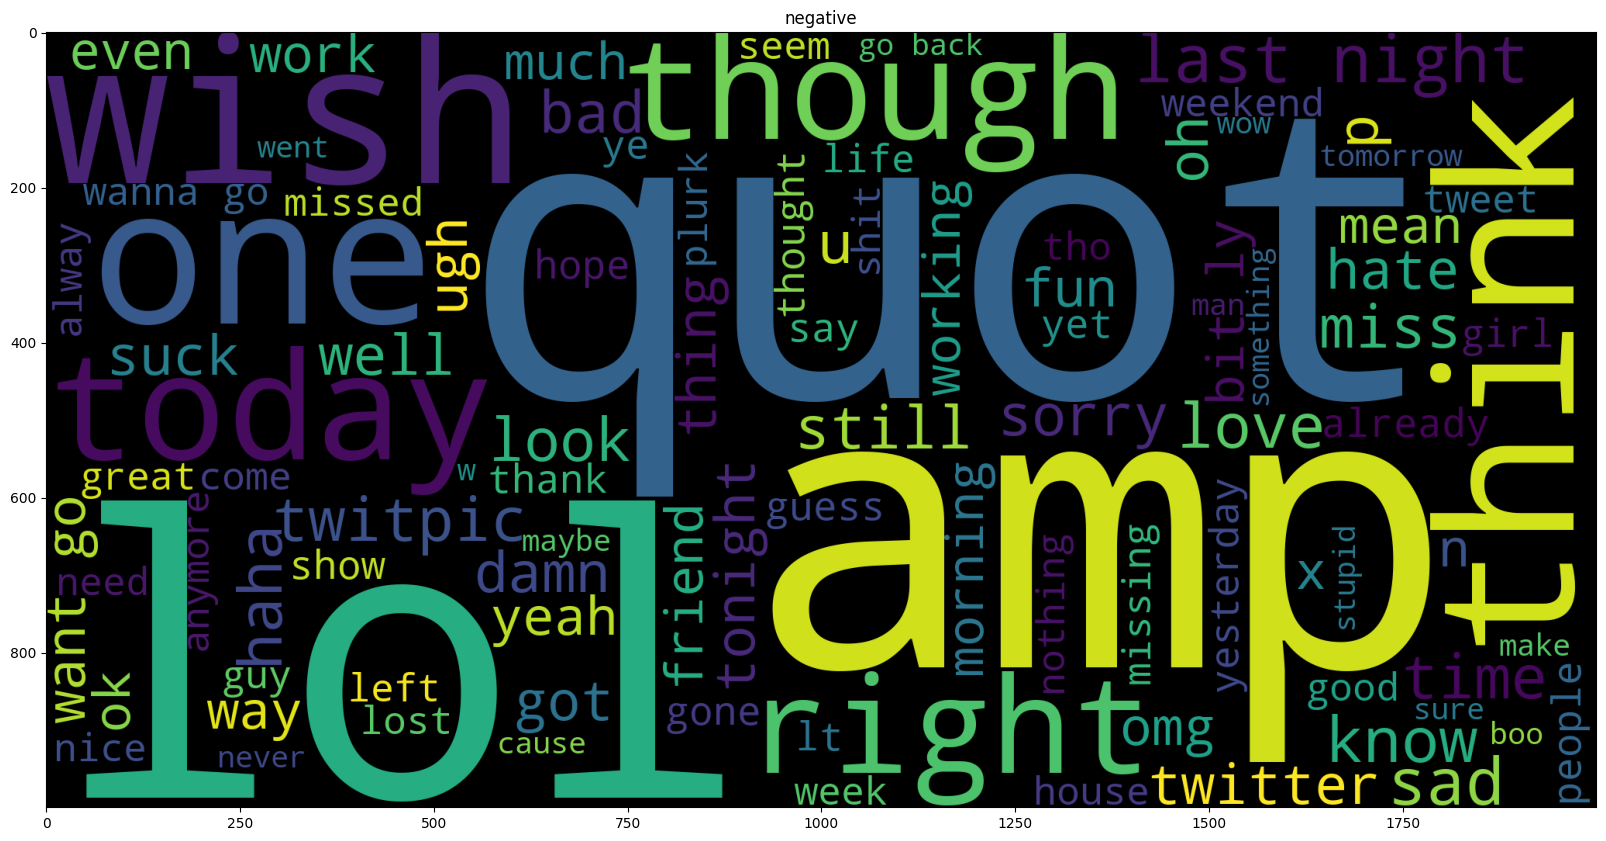

In [25]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='Black',
                      max_words = 100).generate(negative_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("negative")
plt.show()

One word count

In [26]:
def get_count(data):
    dic = {}
    for i in data:
        for j in i:
            if j not in dic:
                dic[j]=1
            else:
                dic[j]+=1    
            
    return(dic)
count_corpus = get_count(positive_list)

In [27]:
count_corpus = pd.DataFrame({"word":count_corpus.keys(),"count":count_corpus.values()})
count_corpus = count_corpus.sort_values(by = "count", ascending = False)


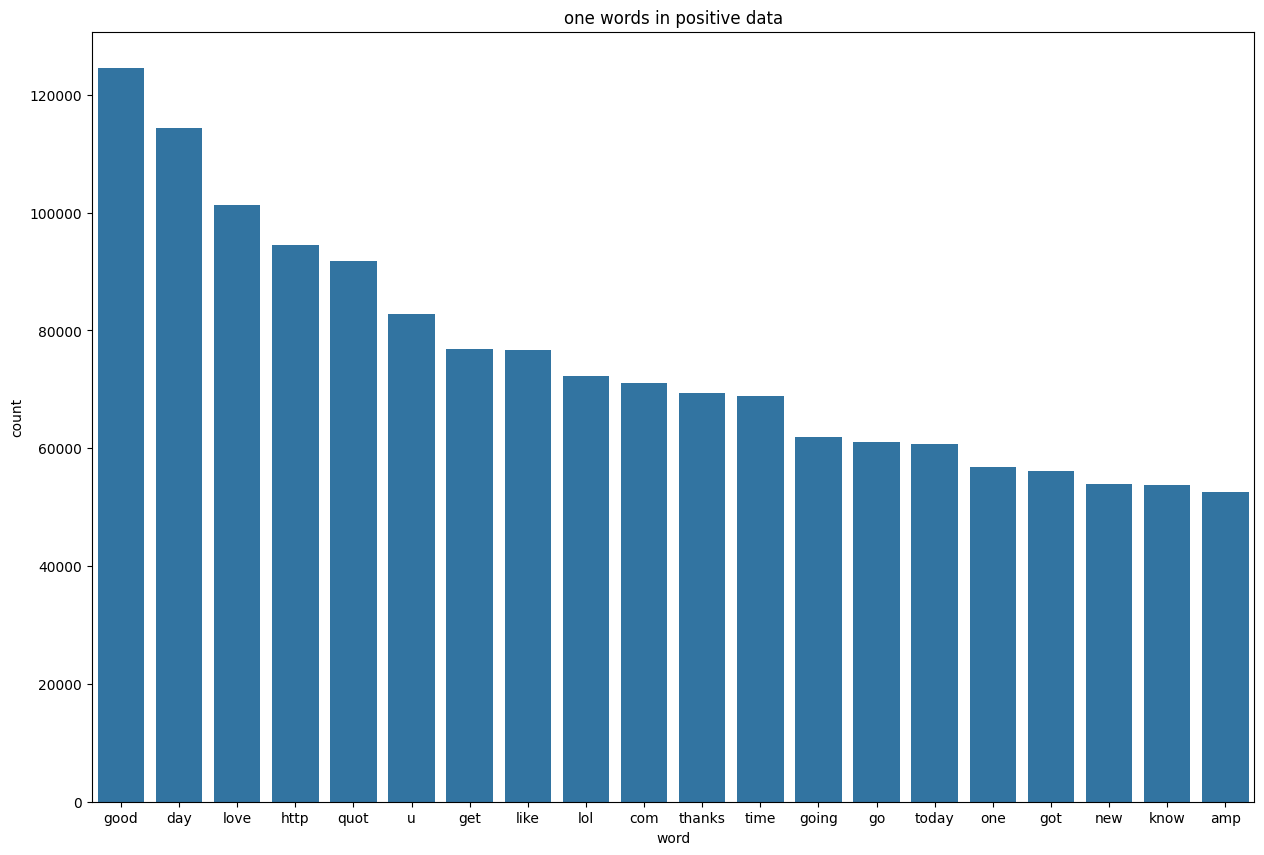

In [28]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x = count_corpus["word"][:20], y = count_corpus["count"][:20])
plt.title('one words in positive data')
plt.show()

In [29]:
def get_count(data):
    dic = {}
    for i in data:
        for j in i:
            if j not in dic:
                dic[j]=1
            else:
                dic[j]+=1    
            
    #dic = dict(sorted(dic.items() , key = lambda x:x[1],reverse=True))
    return(dic)
count_corpus = get_count(negative_list)


In [30]:
count_corpus = pd.DataFrame({"word":count_corpus.keys(),"count":count_corpus.values()})
count_corpus = count_corpus.sort_values(by = "count", ascending = False)

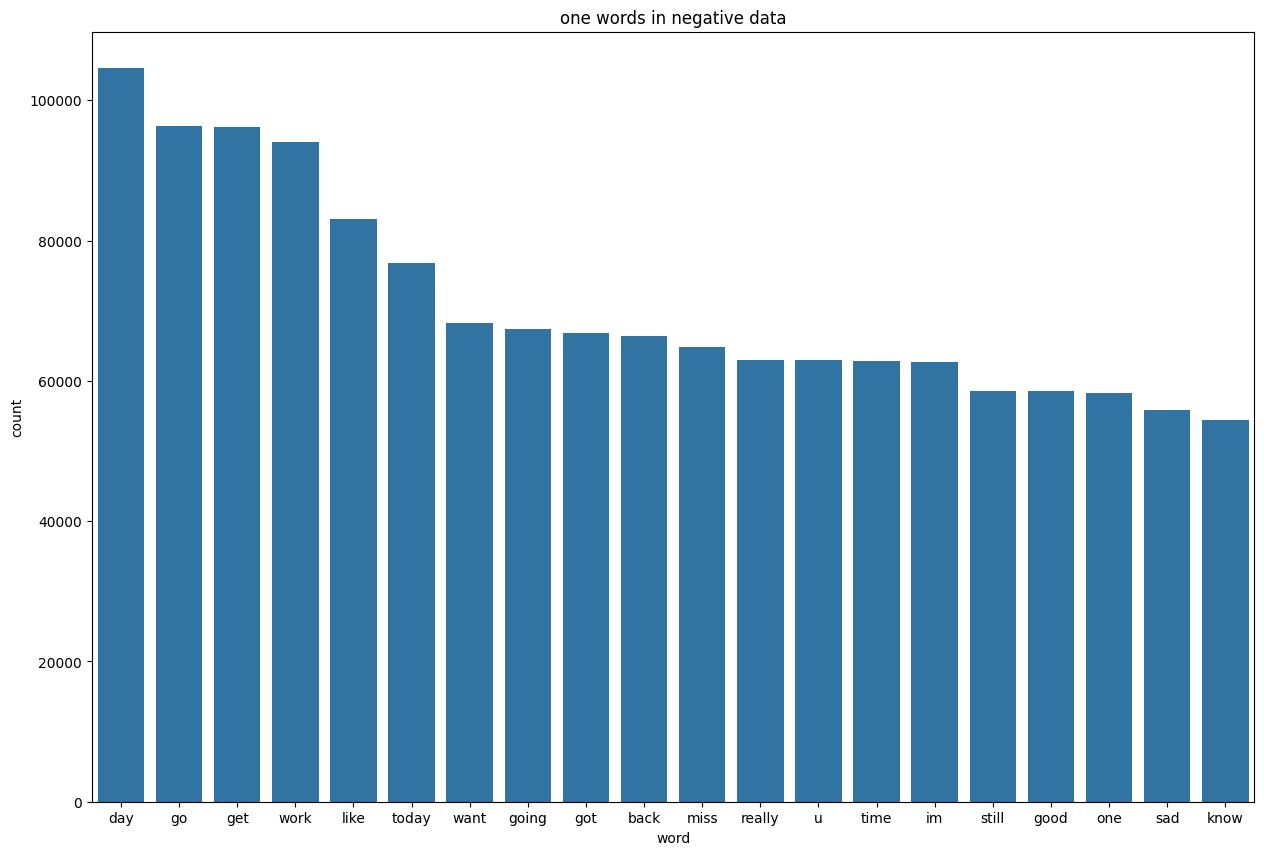

In [31]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x = count_corpus["word"][:20], y = count_corpus["count"][:20])
plt.title('one words in negative data')
plt.show()

Inference

- Positive data has words like good, day, thanks, great, happy
- Negative data has words like work, miss, sad etc

Classification

Naive bayes for sentiment analysis

The Naïve Bayes classifier is a supervised machine learning algorithm, which is used for classification tasks, like text classification. It is also part of a family of generative learning algorithms, meaning that it seeks to model the distribution of inputs of a given class or category

In [32]:
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

positive_tokens_for_model = get_tweets_for_model(positive_list)
negative_tokens_for_model = get_tweets_for_model(negative_list)


In [33]:
import random

positive_dataset = [(review_dict, "Positive")
                     for review_dict in positive_tokens_for_model]

negative_dataset = [(review_dict, "Negative")
                     for review_dict in negative_tokens_for_model]
dataset = positive_dataset + negative_dataset

random.shuffle(dataset)

train_data = dataset[:333091]
test_data = dataset[333091:]

In [34]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print(" Training Accuracy is:", round(classify.accuracy(classifier, train_data),2)*100)

print("Testing Accuracy is:", round(classify.accuracy(classifier, test_data),2)*100)

print(classifier.show_most_informative_features(10))

 Training Accuracy is: 86.0
Testing Accuracy is: 77.0
Most Informative Features
            tweeteradder = True           Positi : Negati =    118.6 : 1.0
                  farrah = True           Negati : Positi =     29.8 : 1.0
                  boohoo = True           Negati : Positi =     28.9 : 1.0
               carradine = True           Negati : Positi =     27.6 : 1.0
                pounding = True           Negati : Positi =     24.9 : 1.0
                 mcmahon = True           Negati : Positi =     22.3 : 1.0
                   ughhh = True           Negati : Positi =     21.7 : 1.0
                  bummed = True           Negati : Positi =     21.1 : 1.0
                     ftl = True           Negati : Positi =     20.9 : 1.0
                 boooooo = True           Negati : Positi =     20.3 : 1.0
None


Term Frequency - Inverse Document Frequency [TFIDF] for sentiment analysis

TF-IDF (Term Frequency - Inverse Document Frequency) is a handy algorithm that uses the frequency of words to determine how relevant those words are to a given document. It's a relatively simple but intuitive approach to weighting words, allowing it to act as a great jumping off point for a variety of tasks.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(data_cleaned['text'])
y = data_cleaned['Sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42,
                                                    stratify = y)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
def metrics(y_train,y_train_pred,y_test,y_test_pred):
  print("training accuracy = ",round(accuracy_score(y_train,y_train_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize = 'all')
  print(classification_report(y_train,y_train_pred))
  plt.show()

  print("testing accuracy = ",round(accuracy_score(y_test,y_test_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,normalize = 'all')
  print(classification_report(y_test,y_test_pred))
  plt.show()

Multinomial NB[Naive Bayes]

Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP). The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article.



training accuracy =  83.0
              precision    recall  f1-score   support

           0       0.82      0.85      0.84   1071998
           1       0.85      0.81      0.83   1072000

    accuracy                           0.83   2143998
   macro avg       0.83      0.83      0.83   2143998
weighted avg       0.83      0.83      0.83   2143998



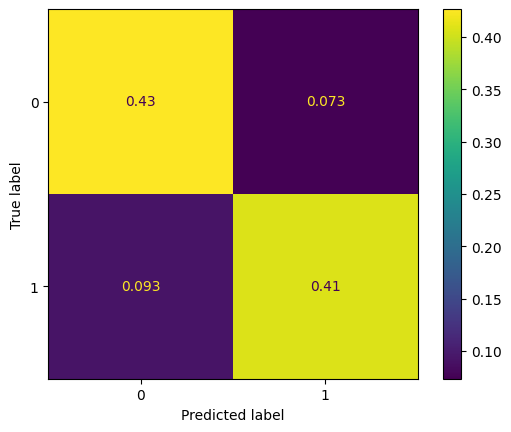

testing accuracy =  80.0
              precision    recall  f1-score   support

           0       0.79      0.82      0.80    528000
           1       0.81      0.78      0.79    528000

    accuracy                           0.80   1056000
   macro avg       0.80      0.80      0.80   1056000
weighted avg       0.80      0.80      0.80   1056000



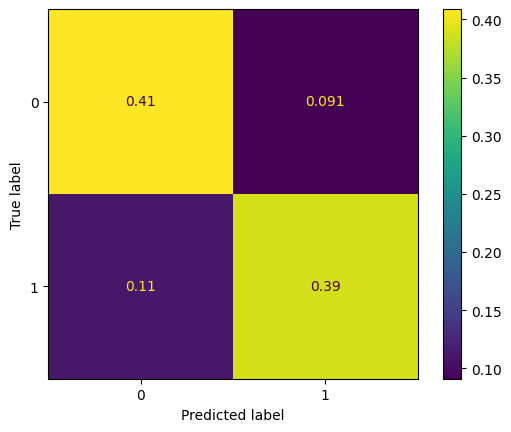

In [ ]:
NB = MultinomialNB()
NB.fit(X_train,y_train)
y_train_pred = NB.predict(X_train)
y_test_pred = NB.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

Linear SVC[Linear Support Vector Machine]

The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is.

training accuracy =  87.0
              precision    recall  f1-score   support

           0       0.88      0.87      0.87   1071998
           1       0.87      0.88      0.87   1072000

    accuracy                           0.87   2143998
   macro avg       0.87      0.87      0.87   2143998
weighted avg       0.87      0.87      0.87   2143998



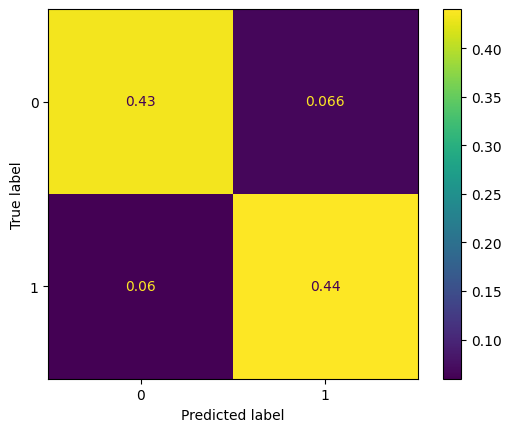

testing accuracy =  83.0
              precision    recall  f1-score   support

           0       0.84      0.82      0.83    528000
           1       0.82      0.84      0.83    528000

    accuracy                           0.83   1056000
   macro avg       0.83      0.83      0.83   1056000
weighted avg       0.83      0.83      0.83   1056000



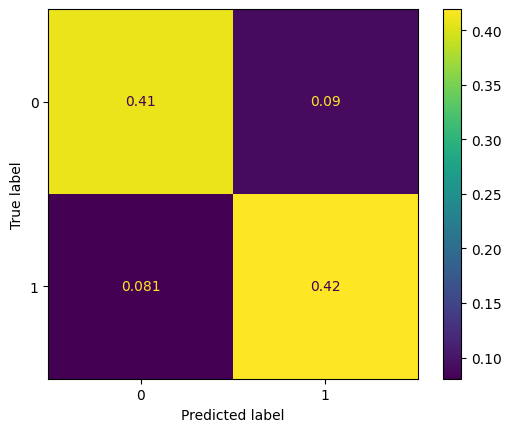

In [ ]:
svc = LinearSVC()
svc.fit(X_train,y_train)
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

Logistic regression

Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables.

training accuracy =  81.0
              precision    recall  f1-score   support

           0       0.83      0.79      0.81   1071998
           1       0.80      0.83      0.82   1072000

    accuracy                           0.81   2143998
   macro avg       0.81      0.81      0.81   2143998
weighted avg       0.81      0.81      0.81   2143998



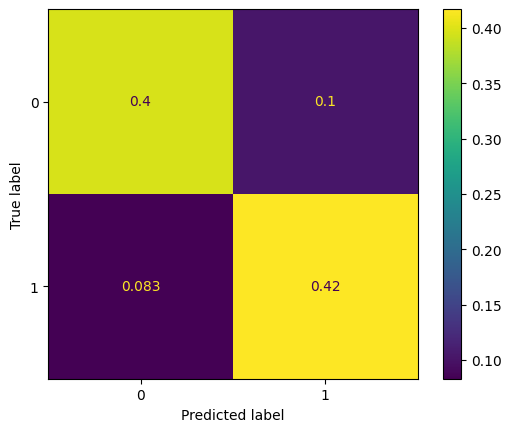

testing accuracy =  79.0
              precision    recall  f1-score   support

           0       0.81      0.77      0.79    528000
           1       0.78      0.82      0.80    528000

    accuracy                           0.79   1056000
   macro avg       0.80      0.79      0.79   1056000
weighted avg       0.80      0.79      0.79   1056000



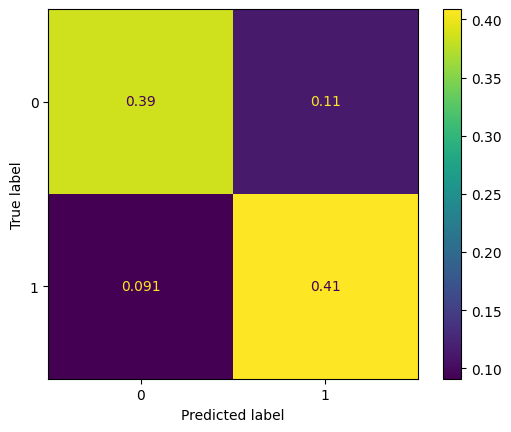

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

Conclusion

- Naive Bayes
    - Training Accuracy  86%
    - Testing  Accuracy  77%
- Multinomial NB	
    - Training Accuracy  83%
    - Testing  Accuracy  80%
- Linear SVC
    - Training Accuracy  87%
    - Testing  Accuracy  83%   
- Logistic
    - Training Accuracy  81%
    - Testing  Accuracy  79%  